# Import software libraries

In [1]:
# Import required libraries.
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import sqlite3                                              # Manage SQL databases.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns                                       # Make charting easier.
import yellowbrick                                          # Visualize elbow and silhouette plots.
from yellowbrick.cluster import SilhouetteVisualizer
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, \
                            confusion_matrix, \
                            classification_report, \
                            scorer, \
                            f1_score, \
                            recall_score, \
                            precision_score, \
                            roc_auc_score, \
                            plot_roc_curve, \
                            plot_precision_recall_curve, \
                            plot_confusion_matrix, \
                            r2_score, \
                            explained_variance_score, \
                            mean_absolute_error, \
                            mean_squared_error
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
import scikitplot as skplt                                  # Generate plots from sklearn models.
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import pickle                                               # Save Python objects as binary files.
from collections import Counter
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- sqlite3 {}'.format(sqlite3.sqlite_version))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- Yellowbrick {}'.format(yellowbrick.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- scikit-plot {}'.format(skplt.__version__))
print('- XGBoost {}'.format(xgboost.__version__))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.19.2
- pandas 1.1.3
- sqlite3 3.30.1
- Matplotlib 3.3.2
- Seaborn 0.11.0
- Yellowbrick 1.3.post1
- scikit-learn 0.23.2
- scikit-plot 0.3.7
- XGBoost 1.3.3


# Load the datasets at each stage of the process

In [2]:
# This loads the raw SQL dataset from the beginning of the Course 2 Project, before ETL is applied.

conn = sqlite3.connect('data/prod_sample.db')

retail_data_raw = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)

retail_data_raw.head()

,name
0,stock_description
1,online_retail_history


In [3]:
# This loads the dataset from the beginning of the Course 3 Project, after ETL is applied but before the data is preprocessed.

retail_data_etl = pd.read_pickle('data/online_history_cleaned.pickle')

retail_data_etl.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,ASSORTED COLOUR BIRD ORNAMENT
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,LUNCH BAG RED RETROSPOT


In [4]:
# This loads the dataset that was created as a result of the Course 3 Project, after preprocessing is applied.

retail_data_prep = pd.read_pickle('data/online_history_cleaned_final.pickle')

retail_data_prep.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Month,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,12,0,1,0,0,0,0,0,0,0
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,12,0,1,0,0,0,0,0,0,0
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,12,0,1,0,0,0,0,0,0,0
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,12,0,0,0,0,1,0,0,0,0
10,536392,84879,16,2010-12-01 10:29:00,1.69,u13705,United Kingdom,27.04,12,1,0,0,0,0,0,0,0,0


In [5]:
# This loads the dataset from the Course 4 Projects that was used to create the machine learning models.

retail_data_ml = pd.read_pickle('data/customer_data.pickle')

retail_data_ml.head()

,frequency,recency,tenure,monetary_value,number_unique_items,churned
u12747,6.0,367.0,369.0,39.19,3,True
u12748,41.0,365.0,369.0,12.01,9,False
u12749,2.0,127.0,130.0,22.28,2,True
u1282,0.0,0.0,326.0,0.00,1,False
u12822,0.0,0.0,87.0,0.00,1,True


# Load the optimal models created from machine learning algorithms

In [6]:
# This loads the classification model that was deemed the best.

classification_model = pickle.load(open('models/best_classification_model.pickle', 'rb'))

In [7]:
# This loads the regression model that was deemed the best.

regression_model = pickle.load(open('models/best_regression_model.pickle', 'rb'))

In [8]:
# This loads the clustering model that was deemed optimal.

clustering_model = pickle.load(open('models/optimal_clustering_model.pickle', 'rb'))

# Example: Generate a lift chart for `churned` and save it to a file

In [9]:
# Split the data into target and features.

target_data = retail_data_ml.churned
features = retail_data_ml.drop(['churned'], axis = 1)

# Split the dataset into separate training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target_data,
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [10]:
# Generate predictions and prediction probabilities for the classifier.
# These are necessary to create the lift chart.

clf_pred = classification_model.predict(X_test)
clf_probas = classification_model.predict_proba(X_test)

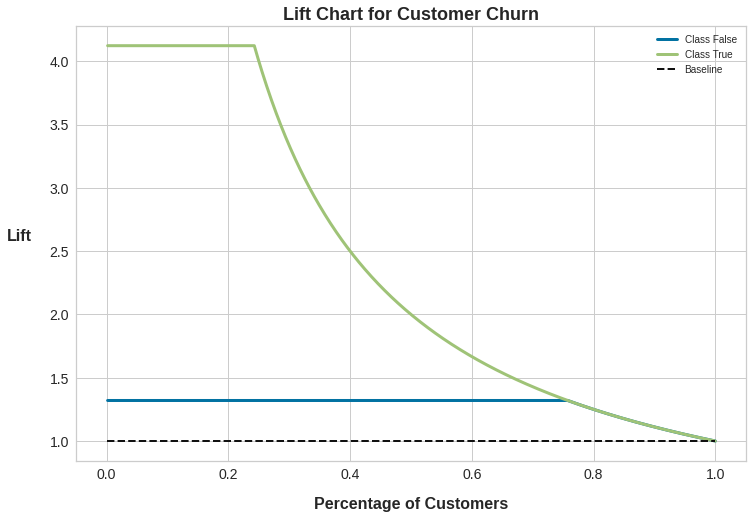

In [11]:
# Generate the lift chart for "churned".

fig = plt.figure(figsize = (12, 8))
ax = fig.subplots()
skplt.metrics.plot_lift_curve(clf_pred, clf_probas, ax = ax)
ax.set_title('Lift Chart for Customer Churn', weight = 'bold',
              size = 18)
ax.set_xlabel('Percentage of Customers', weight = 'bold',
              size = 16, labelpad = 15)
ax.set_ylabel('Lift', weight = 'bold', size = 16,
              labelpad = 30, rotation = 'horizontal')
ax.tick_params(labelsize = 14)
ax.legend(loc = 'upper right')

In [12]:
# This saves the chart to a vector image (SVG) file format.
# You can download the file from the same directory as this notebook and use it in your presentation.

fig.savefig('lift_chart.svg', bbox_inches = 'tight')

TypeError: score() missing 2 required positional arguments: 'X' and 'y'